# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:

##у меня залпает b[и], поэтому, есл местам с этм проблемы, звнте, cmnd+V здесь нужен под другое

import numpy as np


def matrixx (x, y, m):
    
    a = np.array(x)
    
    l = a.shape
    xx = np.zeros((l[0], m + 1))
    for i in range (m + 1):
        xx[:, i] = a ** i
    
    return xx

def ls_coef(x, y, m):
    
    a = np.array(x)
    c = np.array(y)
    
    xx = matrixx(x, y, m)
    temp = xx.T @ xx
    temp = np.linalg.inv(temp)
    temp = temp @ xx.T
    coeffs = temp @ c
    
    
    
    return coeffs



def polynom (x, coeffs):
    
    full = np.zeros_like(x)
    xx = np.array(x)
    
    for i in range(coeffs.size):
        
        full += (coeffs[i] * (xx ** i))
        
    return (full)

<IPython.core.display.Javascript object>


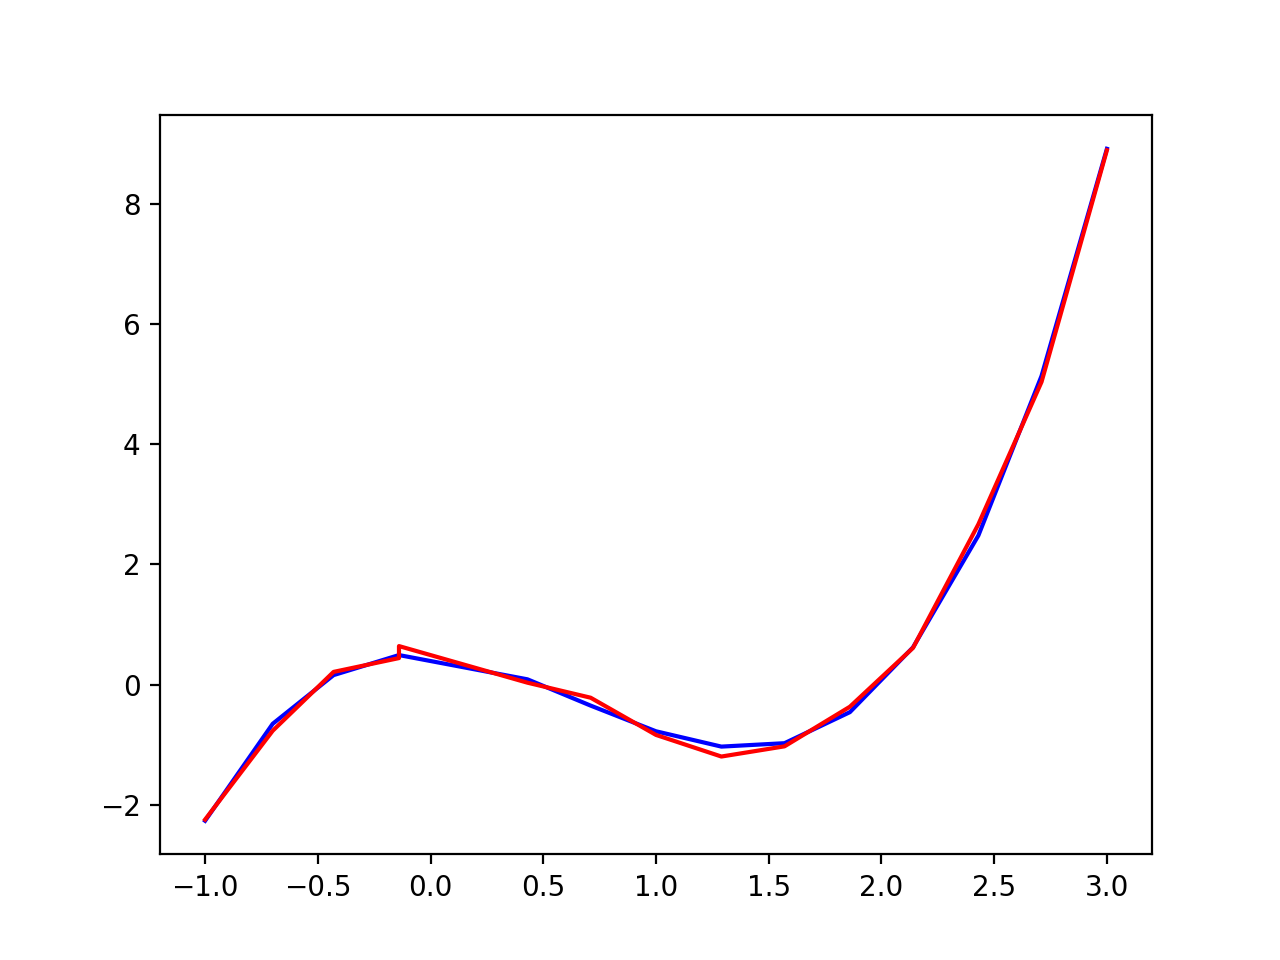

that's fine


In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.figure()


m = 3
coeffs = ls_coef(x, y, m)


plt.plot(x, polynom(x, coeffs), color = 'blue')
plt.plot(x, y, color = 'red')

print("that's fine")

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [4]:

n = len(x)

def sigma2(x, y, m):
    
    r = polynom(x, ls_coef(x, y, m))
    r -= y
    r = r ** 2
    r = sum(r)
    zn = n - m
    sigma2 = 1/zn * r
    
    return sigma2


def sigmam_opt (x, y, rtol = 1e-5):
    
    a = np.zeros_like(x)
    
    
    for i in range (n):
        
        a[i] = sigma2(x, y, (i))
        
        if i!=0 and (a[i] - a[i-1]) >= rtol:
            
            return i-1
        
        else:
            
            continue
            
    return n
    
    
optm = sigmam_opt(x, y)
print(optm)

4


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

<IPython.core.display.Javascript object>


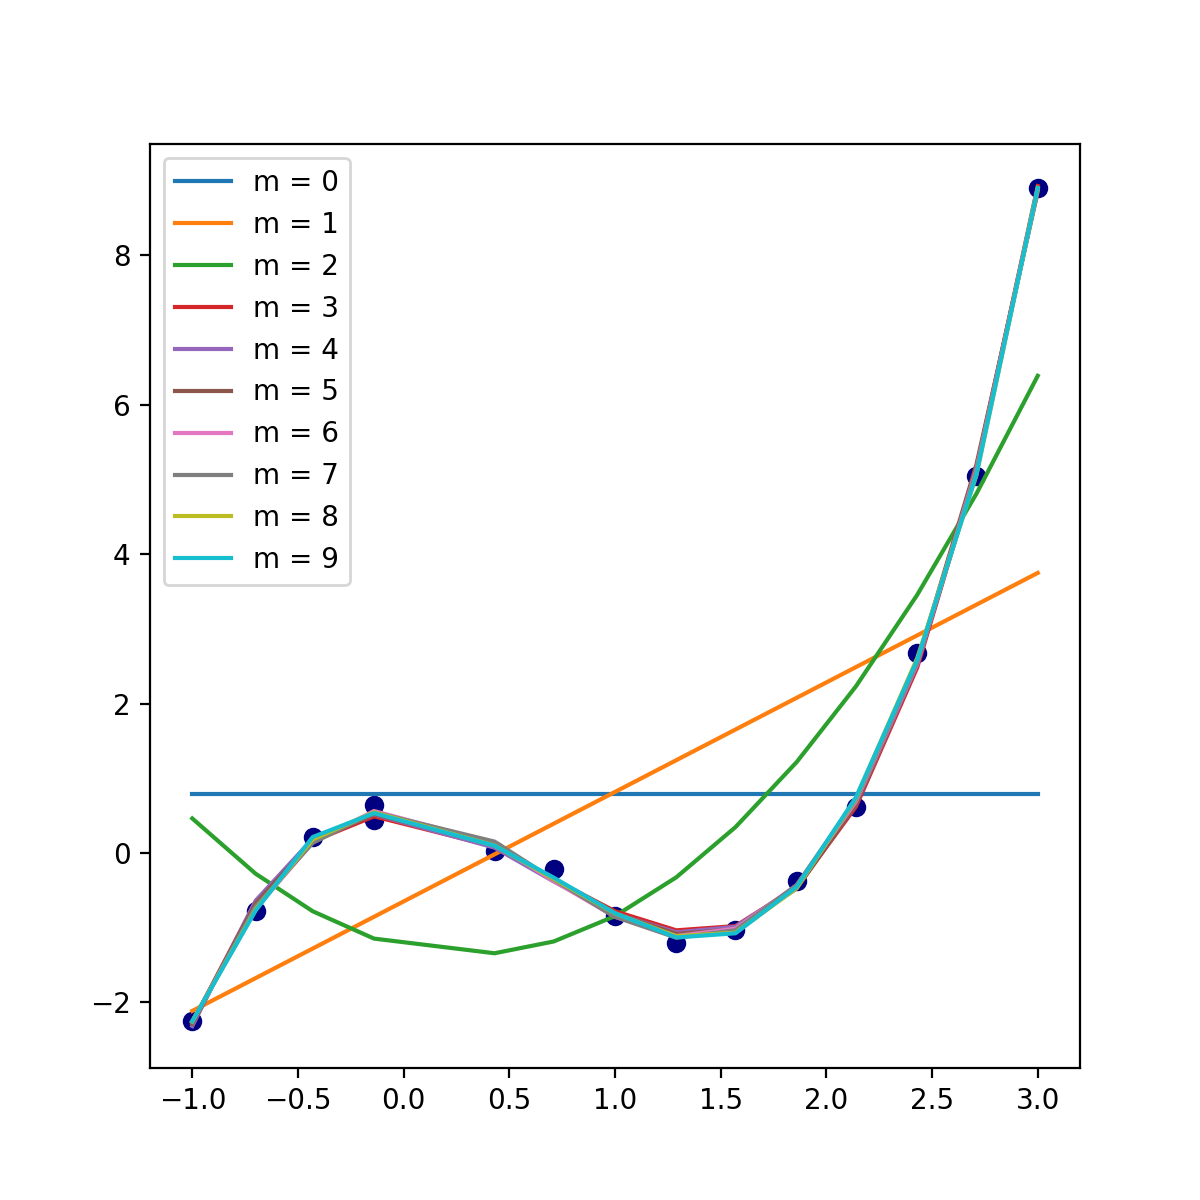

we can see that for m > 4 graphs are really close to each other


In [5]:

plt.figure(figsize=(6, 6))

plt.plot(x, y, 'o', color = 'navy')

for m in range(10):
    
    plt.plot(x, polynom(x, ls_coef(x, y, m)), label = "m = {}".format(m))
plt.legend(loc='best')

print('we can see that for m > 4 graphs are really close to each other')

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

<IPython.core.display.Javascript object>


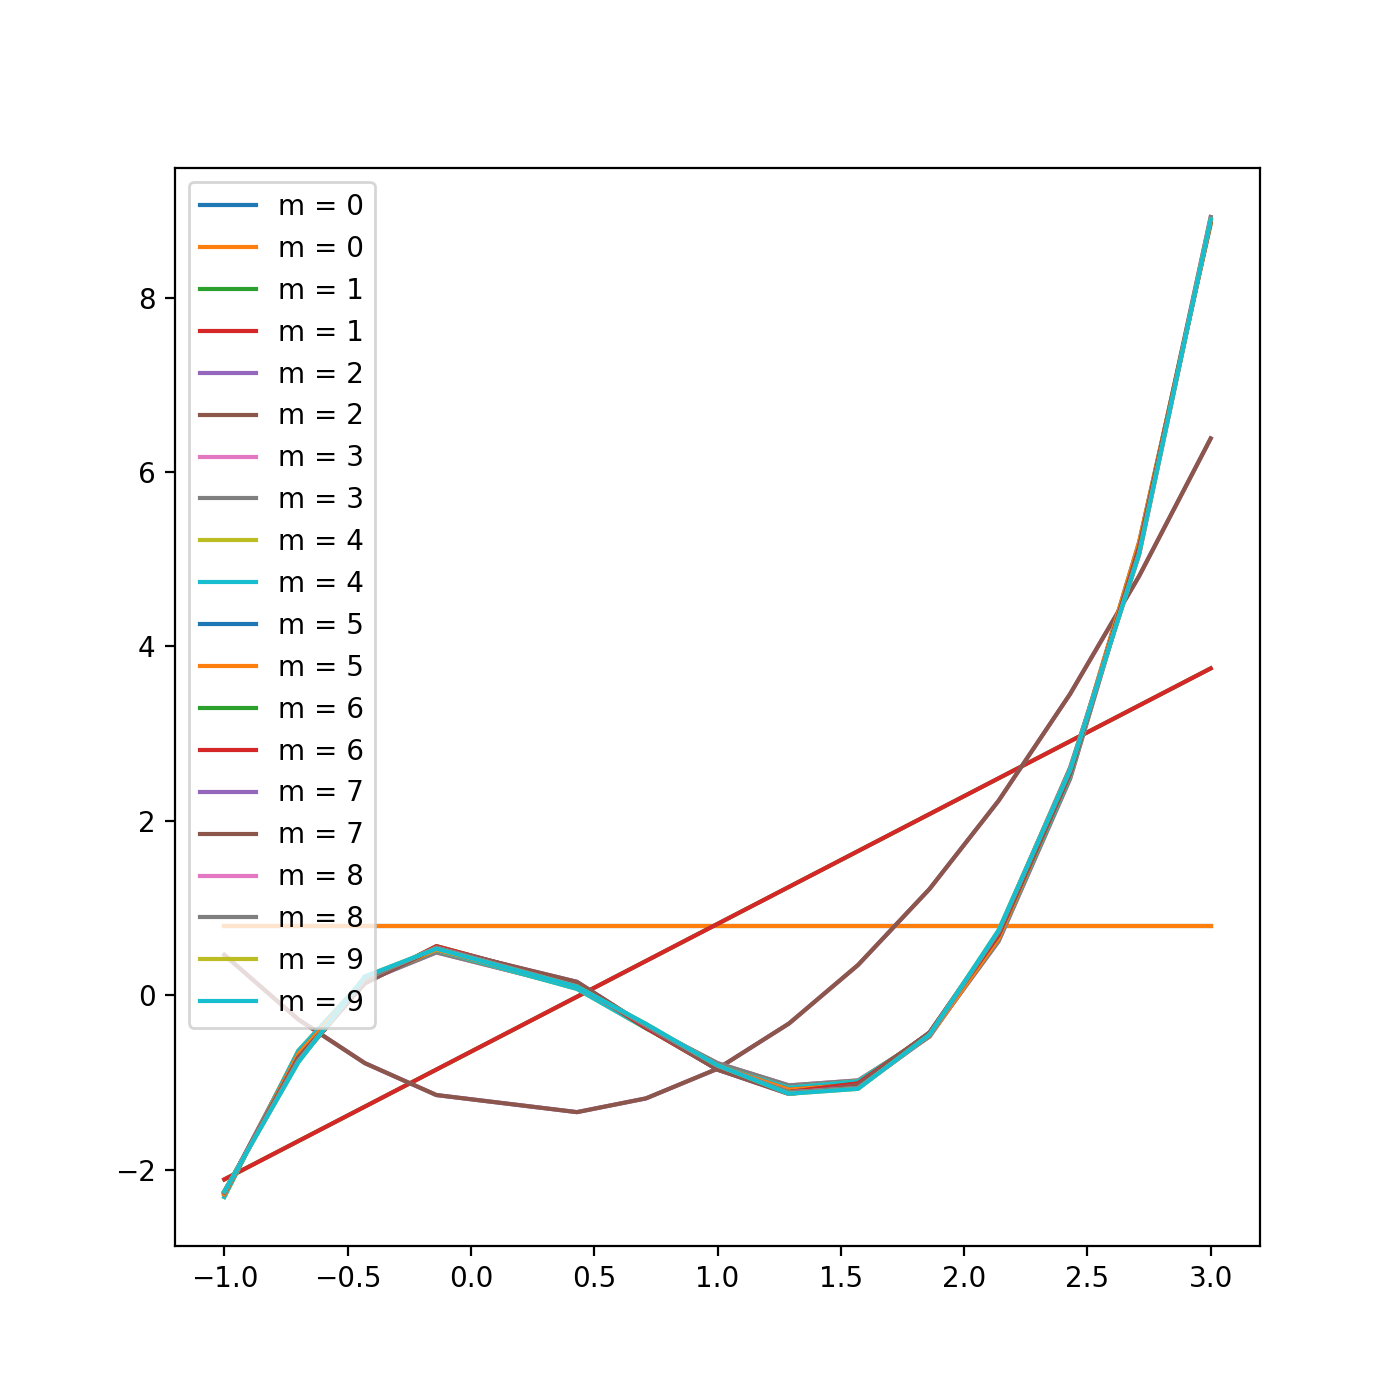

[ 4.18887147e-13 -1.12354570e-13 -1.19459997e-13  8.88178420e-14
 -1.88182803e-14]


In [6]:
%matplotlib notebook
def ls_qr(x, y, m):
    
    a = np.array(x)
    l = a.shape
  
    xx = np.zeros((l[0], m + 1))
    
    for i in range (m + 1):
        
        xx[:, i] = a ** i
              
    q, r = np.linalg.qr(xx)
    
    temp = np.linalg.inv(r)
    temp = temp @ q.T @ y
    
    return temp

plt.figure(figsize = (7,7))

for m in range (10):
    plt.plot(x, polynom(x, ls_coef(x, y, m)), label = "m = {}".format(m))
    plt.plot(x, polynom(x, ls_qr(x, y, m)), label = "m = {}".format(m))
    
plt.legend(loc='best')

print(ls_coef(x, y, 4) - ls_qr(x, y, 4))

### yaay for m > 4 those are all the same!
# almost 0! (ok 1e-13 is 0)

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

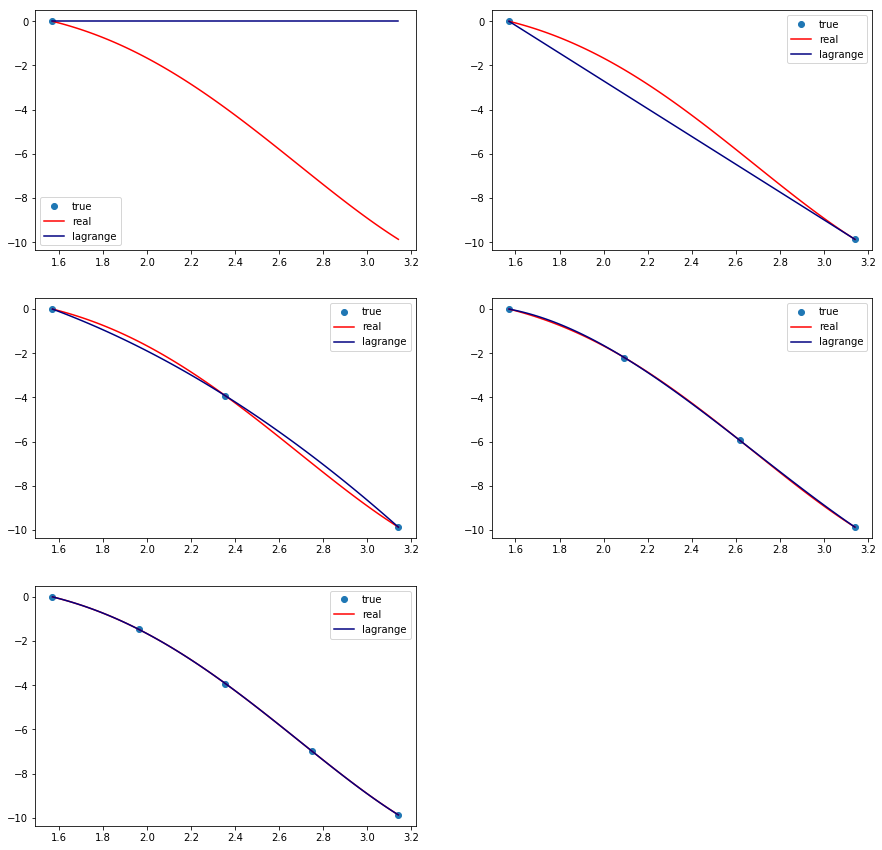

In [7]:
def f(x):
    
    f = x**2 * np.cos(x)
    return f

def lagrangee(temp, x, y):
    
    a = np.array(x)
    c = np.array(y)
    
    n = len(x)
    lg = 0
    
    for i in range(len(c)):
        l = 1

        for j in range(n):
            
            if i != j:
                
                l *= (temp - a[j]) / (a[i] - a[j])
                
        lg += l * c[i]
            
    lg *= np.ones_like(temp)
    
    return lg
             
    
%matplotlib inline    
plt.figure(figsize=(15, 15))


xsx = np.linspace(np.pi / 2 , np.pi, 100)
yss = f(xsx)

for m in range(1, 6):
    
    #plt.figure()
    plt.subplot(3, 2, m)
    xs = np.linspace(np.pi / 2 , np.pi, m)
    ys = f(xs)

    
    plt.plot(xs, ys, 'o', label = "true")
    plt.plot(xsx, yss, label = 'real', color = 'red')
    plt.plot (xsx, lagrangee(xsx, xs, ys), label = "lagrange", color = 'navy')
    
    plt.legend(loc='best')

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

Woah looks like it actually works etter with those!!


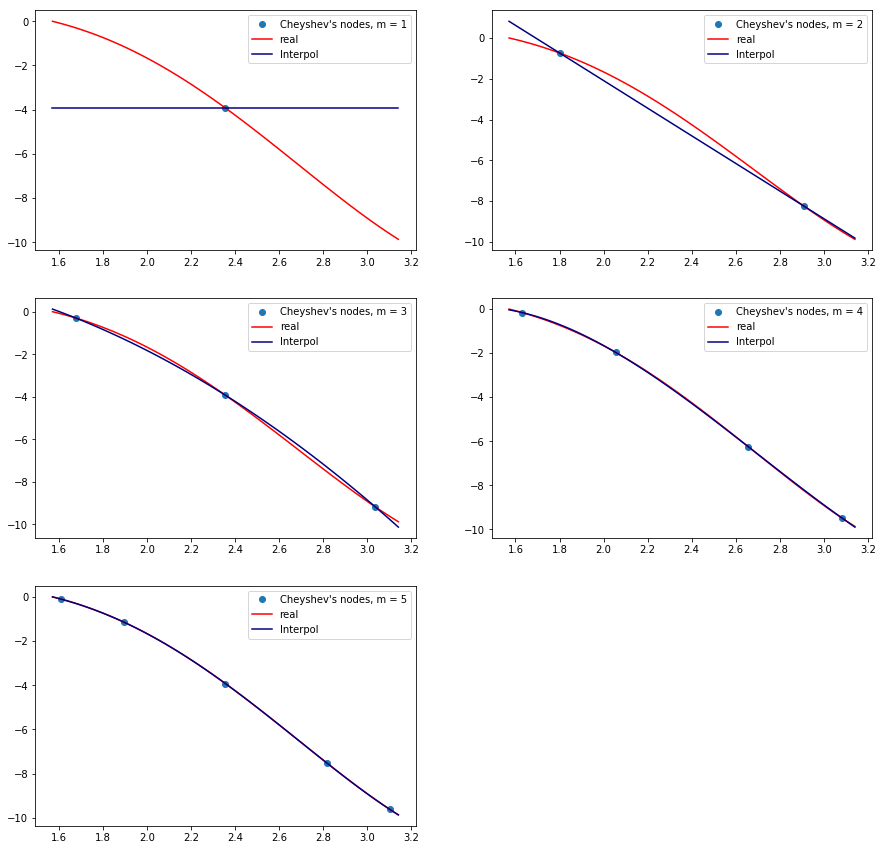

In [8]:
plt.figure(figsize=(15, 15))

for m in range(1,6):
    
    plt.subplot(3, 2, m)
    
    x_che = (np.pi / 2 + np.pi) / 2 + (np.pi - np.pi / 2) / 2 * np.cos((2 * np.arange(1, m + 1) - 1) / (2 * m) * np.pi)
    y_che = f(x_che)
    
    plt.plot(x_che, y_che, 'o', label = "Cheyshev's nodes, m = {}".format(m))
    plt.plot(xsx, yss, label = 'real', color = 'red')
    plt.plot (xsx, lagrangee(xsx, x_che, y_che), label = "Interpol", color = 'navy')
    
    plt.legend(loc='best')
    
    
print( "Woah looks like it actually works etter with those!!")

<img src="giphy-3.gif">